<a href="https://colab.research.google.com/github/pratheeshsailor/-Zee-Recommender-Systems/blob/main/Notebook_1_OTT_Rec_system_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 1

# Problem Statement :

- Create a Recommender System to show personalized movie recommendations based on ratings given by a user and other users similar to them in order to improve user experience.

---

# Data Dictionary:

### RATINGS FILE DESCRIPTION

- All ratings are contained in the file "ratings.dat" and are in the following format:

      - UserID::MovieID::Rating::Timestamp

      - UserIDs range between 1 and 6040

      - MovieIDs range between 1 and 3952

      - Ratings are made on a 5-star scale (whole-star ratings only)

      - Timestamp is represented in seconds

      - Each user has at least 20 ratings


### USERS FILE DESCRIPTION

- User information is in the file "users.dat" and is in the following format:

    - UserID::Gender::Age::Occupation::Zip-code

- All demographic information is provided voluntarily by the users and is not checked for accuracy.
Only users who have provided some demographic information are included in this data set.

- Gender is denoted by a "M" for male and "F" for female

      Age is chosen from the following ranges:

      1: "Under 18"
      18: "18-24"
      25: "25-34"
      35: "35-44"
      45: "45-49"
      50: "50-55"
      56: "56+"

- Occupation is chosen from the following choices:

      0: "other" or not specified
      1: "academic/educator"
      2: "artist"
      3: "clerical/admin"
      4: "college/grad student"
      5: "customer service"
      6: "doctor/health care"
      7: "executive/managerial"
      8: "farmer"
      9: "homemaker"
      10: "K-12 student"
      11: "lawyer"
      12: "programmer"
      13: "retired"
      14: "sales/marketing"
      15: "scientist"
      16: "self-employed"
      17: "technician/engineer"
      18: "tradesman/craftsman"
      19: "unemployed"
      20: "writer"

### MOVIES FILE DESCRIPTION

- Movie information is in the file "movies.dat" and is in the following format:

     - MovieID::Title::Genres

- Titles are identical to titles provided by the IMDB (including year of release)

      - Genres are pipe-separated and are selected from the following genres:

      Action
      Adventure
      Animation
      Children's
      Comedy
      Crime
      Documentary
      Drama
      Fantasy
      Film-Noir
      Horror
      Musical
      Mystery
      Romance
      Sci-Fi
      Thriller
      War
      Western

In [ ]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)



In [ ]:
movies = pd.read_fwf("zee-movies.dat",encoding="ISO-8859-1")
ratings =pd.read_fwf("zee-ratings.dat",encoding="ISO-8859-1")
users = pd.read_fwf("zee-users.dat",encoding="ISO-8859-1")

In [ ]:
delimiter ="::"

users = users["UserID::Gender::Age::Occupation::Zip-code"].str.split(delimiter,expand = True)
users.columns = ["UserID","Gender","Age","Occupation","Zipcode"]

users["Age"].replace({"1": "Under 18","18": "18-24","25": "25-34",
                          "35": "35-44","45": "45-49","50": "50-55","56": "56+"},inplace=True)

users["Occupation"] = users["Occupation"].astype(int).replace({0: "other",1: "academic/educator",2: "artist",
                                                               3: "clerical/admin",4: "college/grad student",
                                             5: "customer service",6: "doctor/health care",7: "executive/managerial",
                                             8: "farmer" ,9: "homemaker",10: "K-12 student",11: "lawyer",
                                             12: "programmer",13: "retired",14: "sales/marketing",15: "scientist",
                                             16: "self-employed",17: "technician/engineer",
                                             18: "tradesman/craftsman",19: "unemployed",20: "writer"},
                                            )

delimiter ="::"

ratings = ratings["UserID::MovieID::Rating::Timestamp"].str.split(delimiter,expand = True)
ratings.columns = ["UserID","MovieID","Rating","Timestamp"]


movies.drop(["Unnamed: 1","Unnamed: 2"],axis = 1,inplace=True)



delimiter ="::"

movies = movies["Movie ID::Title::Genres"].str.split(delimiter,expand = True)
movies.columns = ["MovieID","Title","Genres"]


movies.shape,ratings.shape,users.shape


((3883, 3), (1000209, 4), (6040, 5))

In [ ]:
movies # need to take care of Genres .

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [ ]:
ratings # need to convert timestamp to hrs.

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [ ]:
users

,UserID,Gender,Age,Occupation,Zipcode
0,1,F,Under 18,K-12 student,48067
1,2,M,56+,self-employed,70072
2,3,M,25-34,scientist,55117
3,4,M,45-49,executive/managerial,02460
4,5,M,25-34,writer,55455
...,...,...,...,...,...
6035,6036,F,25-34,scientist,32603
6036,6037,F,45-49,academic/educator,76006
6037,6038,F,56+,academic/educator,14706
6038,6039,F,45-49,other,01060


In [ ]:
# taking out the release year from the title column from movie table :

movies["Release_year"] = movies["Title"].str.extract('^(.+)\s\(([0-9]*)\)$',expand = True)[1]
movies["Title"] = movies["Title"].str.split("(").apply(lambda x:x[0])


# Converting timestamp to hours

from datetime import datetime
ratings["Watch_Hour"] =ratings["Timestamp"].apply(lambda x:datetime.fromtimestamp(int(x)).hour)
ratings.drop(["Timestamp"],axis = 1,inplace=True)

In [ ]:
movies.shape,ratings.shape,users.shape


((3883, 4), (1000209, 4), (6040, 5))

#### Merging all the tables into one data frame :

In [ ]:
df = users.merge(movies.merge(ratings,on="MovieID",how="outer"),on="UserID",how="outer")

In [ ]:
df.shape

(1000386, 11)

In [ ]:
df

,UserID,Gender,Age,Occupation,Zipcode,MovieID,Title,Genres,Release_year,Rating,Watch_Hour
0,1,F,Under 18,K-12 student,48067,1,Toy Story,Animation|Children's|Comedy,1995,5,23.0
1,1,F,Under 18,K-12 student,48067,48,Pocahontas,Animation|Children's|Musical|Romance,1995,5,23.0
2,1,F,Under 18,K-12 student,48067,150,Apollo 13,Drama,1995,5,22.0
3,1,F,Under 18,K-12 student,48067,260,Star Wars: Episode IV - A New Hope,Action|Adventure|Fantas,1977,4,22.0
4,1,F,Under 18,K-12 student,48067,527,Schindler's List,Drama|War,1993,5,23.0
...,...,...,...,...,...,...,...,...,...,...,...
1000381,NaN,NaN,NaN,NaN,NaN,3650,Anguish,Horror,1986,NaN,NaN
1000382,NaN,NaN,NaN,NaN,NaN,3750,Boricua's Bond,Drama,2000,NaN,NaN
1000383,NaN,NaN,NaN,NaN,NaN,3829,Mad About Mambo,Comedy|Romance,2000,NaN,NaN
1000384,NaN,NaN,NaN,NaN,NaN,3856,Autumn Heart,Drama,1999,NaN,NaN


In [ ]:
df_ = df.copy()

In [ ]:
df_.dropna(inplace=True)

In [ ]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996144 entries, 0 to 1000208
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   UserID        996144 non-null  object 
 1   Gender        996144 non-null  object 
 2   Age           996144 non-null  object 
 3   Occupation    996144 non-null  object 
 4   Zipcode       996144 non-null  object 
 5   MovieID       996144 non-null  object 
 6   Title         996144 non-null  object 
 7   Genres        996144 non-null  object 
 8   Release_year  996144 non-null  object 
 9   Rating        996144 non-null  object 
 10  Watch_Hour    996144 non-null  float64
dtypes: float64(1), object(10)
memory usage: 91.2+ MB


In [ ]:
df_['Release_year']=df_['Release_year'].astype('int32')
df_['Rating']=df_['Rating'].astype('int32')


In [ ]:
bins = [1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 2000]
labels = ['20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']

df_["Released_In"] =  pd.cut(df_['Release_year'], bins=bins, labels=labels)

In [ ]:
import seaborn as sns

## Average user rating distribution :

<Axes: xlabel='Rating', ylabel='Count'>

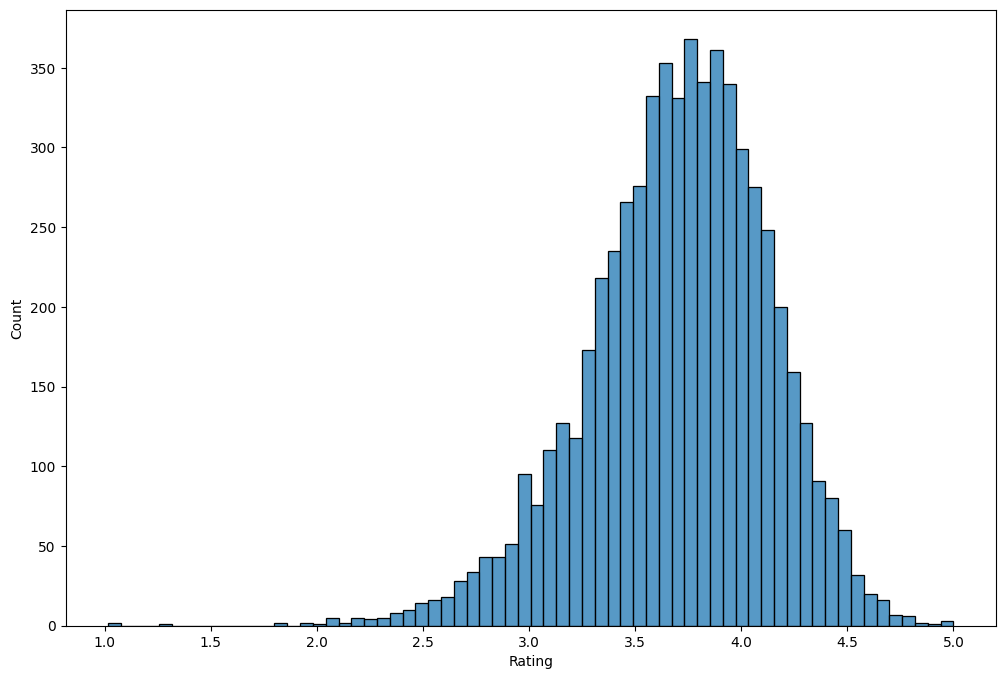

In [ ]:
sns.histplot(df_[['UserID','Rating']].groupby('UserID').mean()["Rating"])

# average ratings given by each user distribution

<Axes: xlabel='Rating', ylabel='Count'>

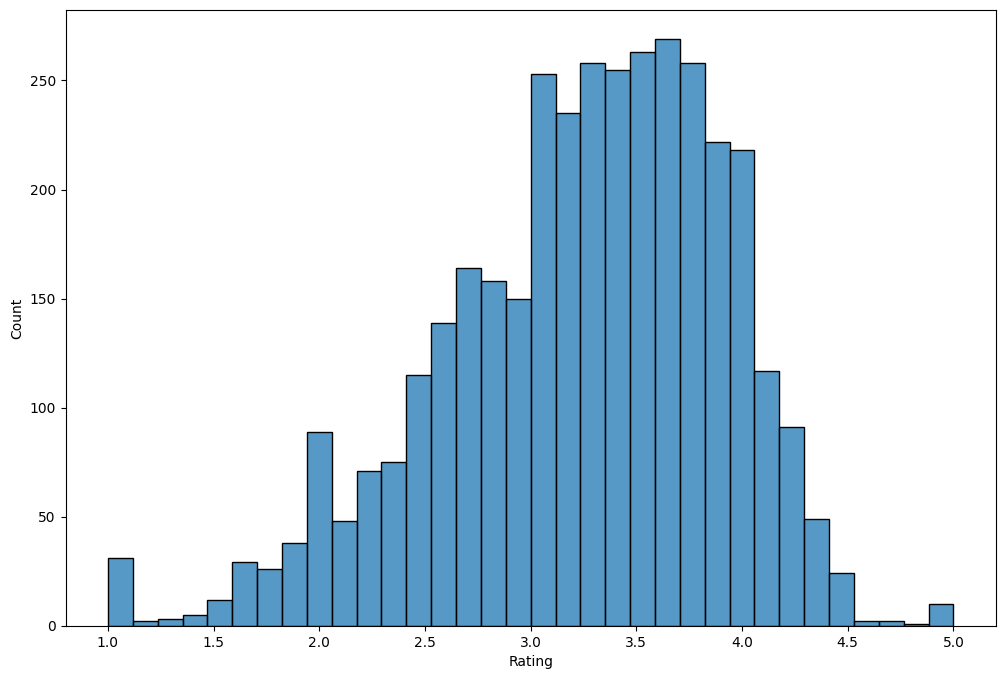

In [ ]:
sns.histplot(df_[['MovieID','Rating']].groupby('MovieID').mean()["Rating"])

# average rating , that each movie has receieved by users .

In [ ]:
df_["MovieID"].nunique()

3682

In [ ]:
movies_per_decade = df_[['MovieID','Released_In']].groupby('Released_In').nunique()
movies_per_decade["% of all Movies"] = (movies_per_decade["MovieID"]/(df_["MovieID"].nunique())) * 100
movies_per_decade

,MovieID,% of all Movies
Released_In,,
20s,23,0.624661
30s,71,1.928300
40s,120,3.259098
50s,164,4.454101
60s,184,4.997284
70s,237,6.436719
80s,586,15.915263
90s,2294,62.303096


<Axes: xlabel='Released_In', ylabel='% of all Movies'>

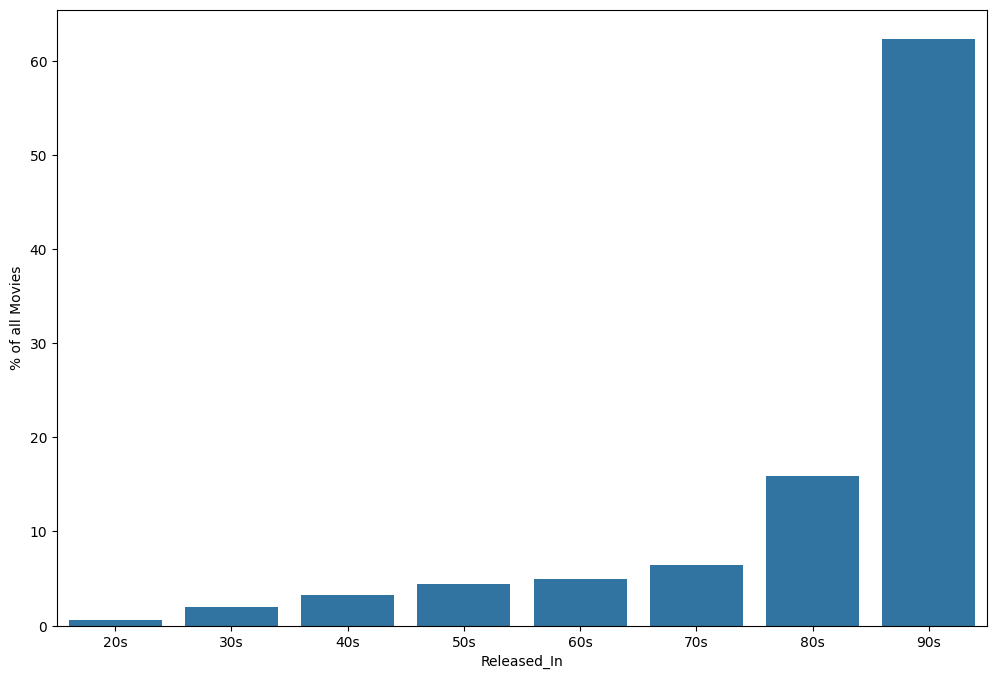

In [ ]:
sns.barplot(x= movies_per_decade.index,y=movies_per_decade["% of all Movies"])

In [ ]:
m = movies[["MovieID","Title","Genres"]]
m["Genres"] = m["Genres"].str.split("|")
m = m.explode("Genres")
m["Genres"] = m["Genres"].replace({"":"Other","Horro":"Horror","Sci-":"Sci-Fi","Sci":"Sci-Fi","Sci-F":"Sci-Fi","Dr":"Drama","Documenta":"Documentary",
                     "Wester":"Western","Fant":"Fantasy","Chil":"Children's","R":"Romance","D":"Drama","Rom":"Romance","Animati":"Animation","Childr":"Children's","Childre":"Children's",
                     "Fantas":"Fantasy","Come":"Comedy","Dram":"Drama","S":"Sci-Fi","Roma":"Romance","A":"Adventure","Children":"Children's","Adventu":"Adventure","Adv":"Adventure",
                      "Wa":"War","Thrille"  :"Thriller","Com":"Comedy","Comed":"Comedy","Acti":"Action","Advent":"Adventure","Adventur":"Adventure","Thri":"Thriller",
                        "Chi":"Children's","Ro":"Romance","F":"Fantasy","We":"Western","Documen":"Documentary","Music":"Musical","Children":"Children's" ,"Horr":"Horror",
                     "Children'":"Children's","Roman":"Romance","Docu":"Documentary","Th":"Thriller","Document":"Documentary"
                    })

m = m.pivot_table(values="Title", index="MovieID", columns="Genres", aggfunc= np.size,).fillna(0)


def apply(x):
  if x >= 1:
    return 1
  else:
    return 0

m["Adventure"] = m["Adventure"].apply(apply)
m = m.astype(int)

In [ ]:
m

Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Other,Romance,Sci-Fi,Thriller,War,Western
MovieID,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
100,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
996,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
997,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
final_data = df.merge(m,on="MovieID",how="left").drop(["Genres"],axis = 1)

In [ ]:
final_data

,UserID,Gender,Age,Occupation,Zipcode,MovieID,Title,Release_year,Rating,Watch_Hour,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Other,Romance,Sci-Fi,Thriller,War,Western
0,1,F,Under 18,K-12 student,48067,1,Toy Story,1995,5,23.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,F,Under 18,K-12 student,48067,48,Pocahontas,1995,5,23.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,F,Under 18,K-12 student,48067,150,Apollo 13,1995,5,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,F,Under 18,K-12 student,48067,260,Star Wars: Episode IV - A New Hope,1977,4,22.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,F,Under 18,K-12 student,48067,527,Schindler's List,1993,5,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000381,NaN,NaN,NaN,NaN,NaN,3650,Anguish,1986,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000382,NaN,NaN,NaN,NaN,NaN,3750,Boricua's Bond,2000,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000383,NaN,NaN,NaN,NaN,NaN,3829,Mad About Mambo,2000,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1000384,NaN,NaN,NaN,NaN,NaN,3856,Autumn Heart,1999,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_data.MovieID = final_data.MovieID.astype(int)
final_data.UserID = final_data.UserID.astype(float)
final_data.Release_year = final_data.Release_year.astype(float)

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000386 entries, 0 to 1000385
Data columns (total 29 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   UserID        1000209 non-null  float64
 1   Gender        1000209 non-null  object 
 2   Age           1000209 non-null  object 
 3   Occupation    1000209 non-null  object 
 4   Zipcode       1000209 non-null  object 
 5   MovieID       1000386 non-null  int64  
 6   Title         1000386 non-null  object 
 7   Release_year  996606 non-null   float64
 8   Rating        1000209 non-null  object 
 9   Watch_Hour    1000209 non-null  float64
 10  Action        996320 non-null   float64
 11  Adventure     996320 non-null   float64
 12  Animation     996320 non-null   float64
 13  Children's    996320 non-null   float64
 14  Comedy        996320 non-null   float64
 15  Crime         996320 non-null   float64
 16  Documentary   996320 non-null   float64
 17  Drama         996320 non-nu

In [ ]:
final_data.describe()

,UserID,MovieID,Release_year,Watch_Hour,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Other,Romance,Sci-Fi,Thriller,War,Western
count,1.000209e+06,1.000386e+06,996606.000000,1.000209e+06,996320.000000,996320.000000,996320.000000,996320.000000,996320.000000,996320.000000,996320.000000,996320.000000,996320.000000,996320.000000,996320.000000,996320.000000,996320.000000,996320.000000,996320.000000,996320.000000,996320.000000,996320.000000,996320.000000
mean,3.024512e+03,1.865526e+03,1986.758010,1.191620e+01,0.257534,0.134088,0.043107,0.072154,0.354897,0.079690,0.007845,0.351459,0.032285,0.018328,0.076553,0.041570,0.039698,0.001642,0.142813,0.142599,0.189203,0.061284,0.020760
std,1.728413e+03,1.096030e+03,14.314345,7.894465e+00,0.437276,0.340747,0.203097,0.258742,0.478482,0.270813,0.088223,0.477426,0.176756,0.134136,0.265881,0.199604,0.195249,0.040489,0.349882,0.349663,0.391670,0.239850,0.142581
min,1.000000e+00,1.000000e+00,1919.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.506000e+03,1.030000e+03,1982.000000,4.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.070000e+03,1.835000e+03,1992.000000,1.400000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.476000e+03,2.770000e+03,1997.000000,1.900000e+01,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.040000e+03,3.952000e+03,2000.000000,2.300000e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
final_data.describe(include="object")

,Gender,Age,Occupation,Zipcode,Title,Rating
count,1000209,1000209,1000209,1000209,1000386,1000209
unique,2,7,21,3439,3833,5
top,M,25-34,college/grad student,94110,American Beauty,4
freq,753769,395556,131032,3802,3428,348971


In [ ]:
final_data.nunique()

UserID          6040
Gender             2
Age                7
Occupation        21
Zipcode         3439
MovieID         3883
Title           3833
Release_year      81
Rating             5
Watch_Hour        24
Action             2
Adventure          2
Animation          2
Children's         2
Comedy             2
Crime              2
Documentary        2
Drama              2
Fantasy            2
Film-Noir          2
Horror             2
Musical            2
Mystery            2
Other              2
Romance            2
Sci-Fi             2
Thriller           2
War                2
Western            2
dtype: int64

---
#### Unique values present in data
---
- 6040 unique UserID
- 7 different age groups
- 21 occupations
- 3439 different locations of users
-3883 unique movies

---
- There are movies available in database , which were never been watched by any user before .
- Thats is the reason we have lots of NaN values in our final dataset.
---

In [ ]:
final_data.shape

(1000386, 29)

In [ ]:
plt.rcParams["figure.figsize"] = (20,8)


## Most of the movies present in our dataset were released in year:


<Axes: xlabel='Release_year'>

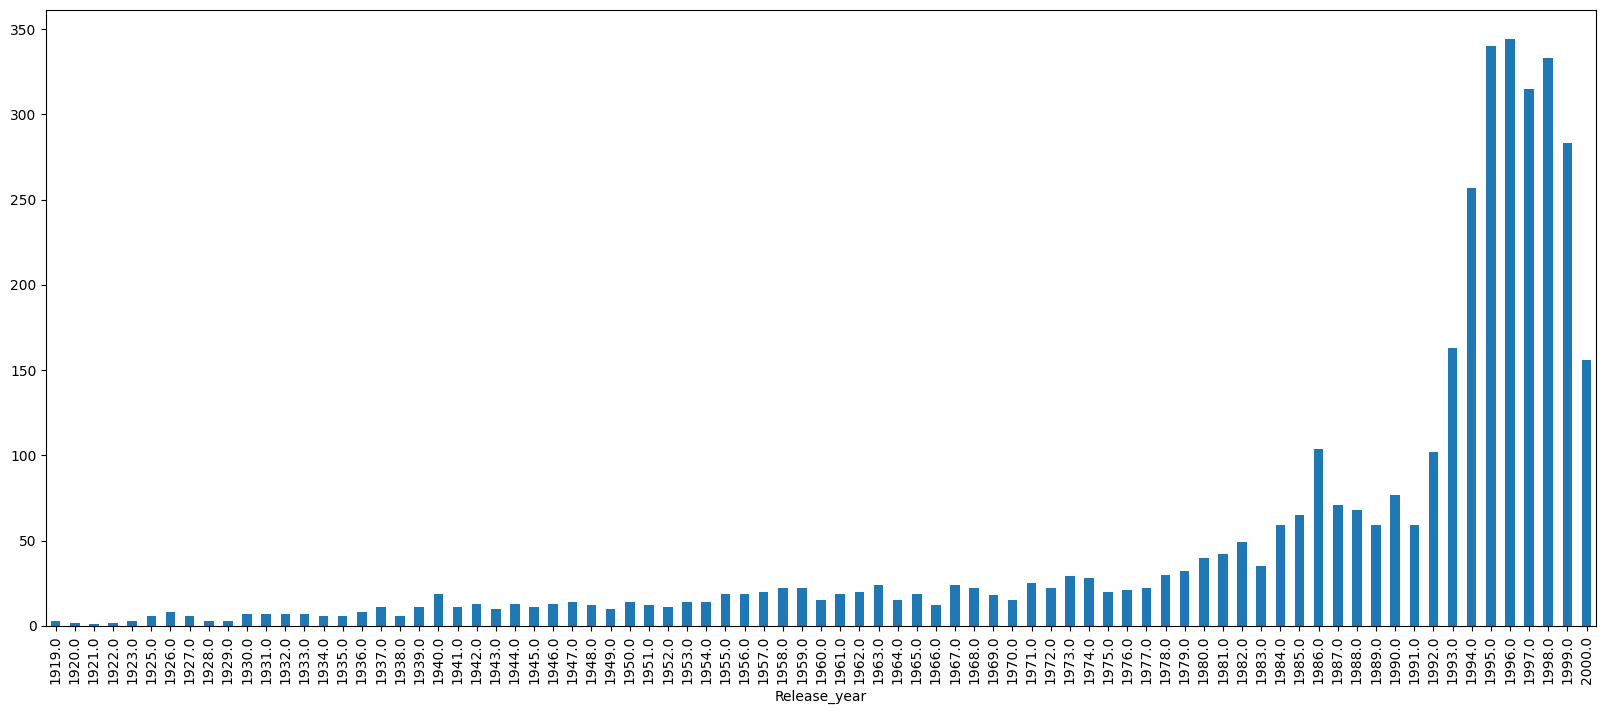

In [ ]:
final_data.groupby("Release_year")["Title"].nunique().plot(kind="bar")

<Axes: xlabel='Genres', ylabel='None'>

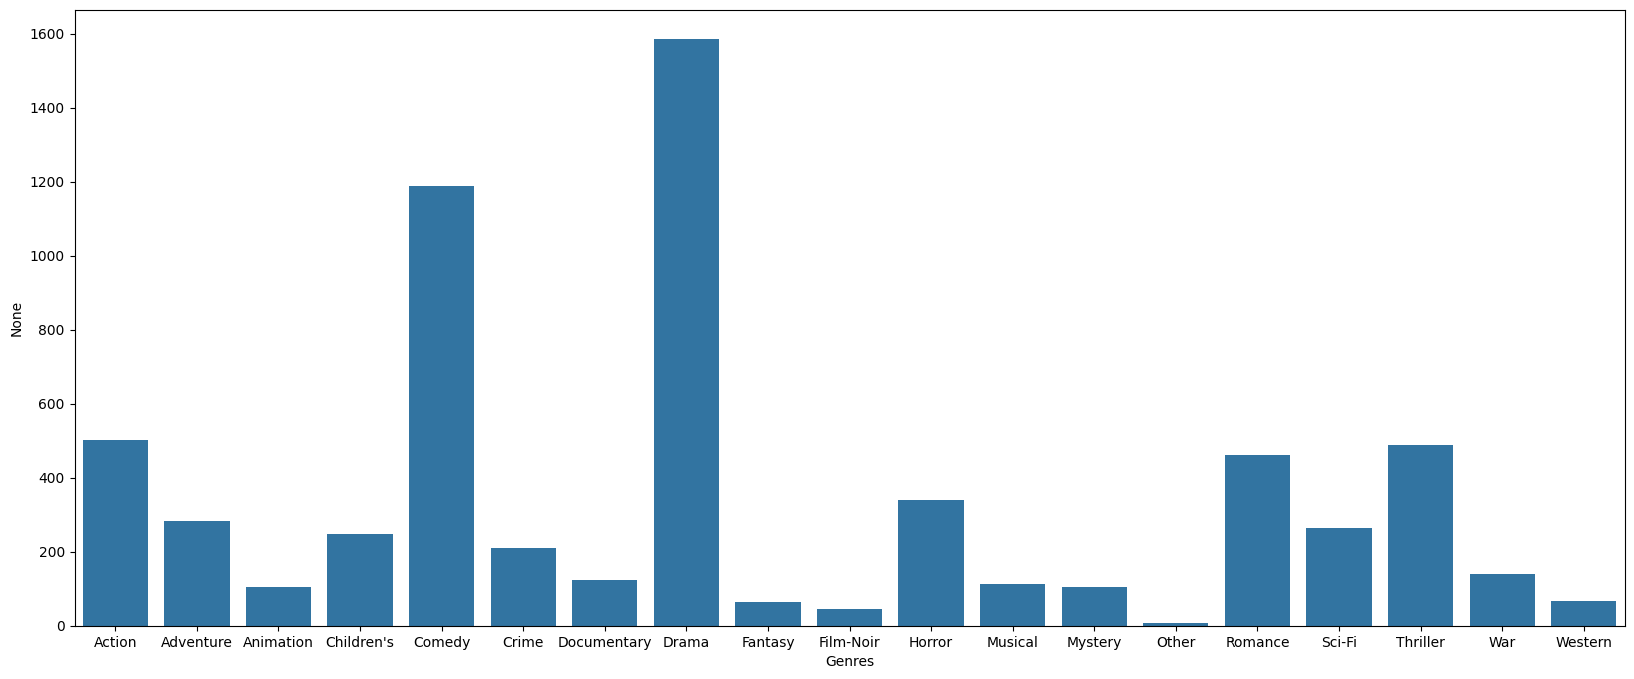

In [ ]:
# Number of Movies per Genres:

sns.barplot(x=m.sum(axis= 0).index,y=m.sum(axis= 0))

In [ ]:
m.sum(axis= 0)

Genres
Action          501
Adventure       283
Animation       104
Children's      249
Comedy         1189
Crime           210
Documentary     124
Drama          1585
Fantasy          63
Film-Noir        44
Horror          340
Musical         113
Mystery         105
Other             8
Romance         462
Sci-Fi          265
Thriller        488
War             139
Western          68
dtype: int64

In [ ]:
final_data["Rating"].count()

1000209

## Number of movies Rated by each Gender type :

In [ ]:
# Gender

asd = final_data.groupby("Gender")["Rating"].count() / final_data["Rating"].count() * 100
asd


Gender
F    24.63885
M    75.36115
Name: Rating, dtype: float64

([<matplotlib.patches.Wedge at 0x7c48627bd0c0>,
 [Text(0.7865921924460241, 0.7689426004474957, 'Female'),
  Text(-0.7865921564492223, -0.7689426372705329, 'Male')],
 [Text(0.4290502867887404, 0.4194232366077249, '24.6%'),
  Text(-0.4290502671541212, -0.4194232566930179, '75.4%')])

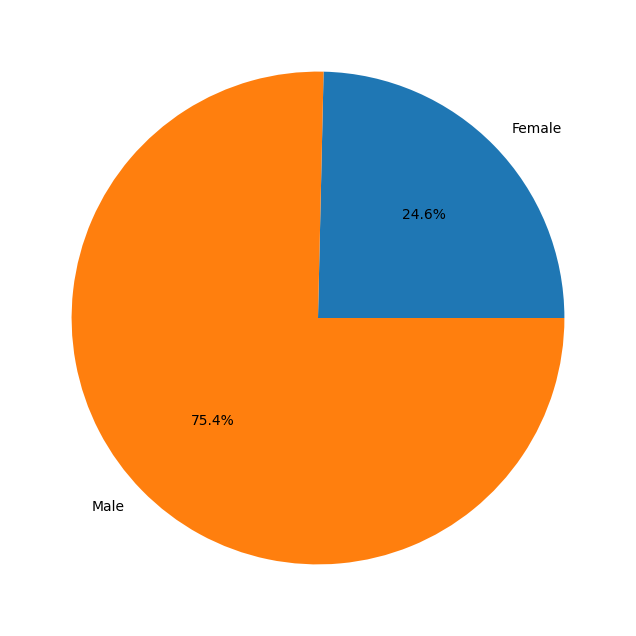

In [ ]:
plt.pie(asd, labels = ["Female", "Male"],autopct='%1.1f%%')

## Users of which age group have watched and rated the most number of movies?

<Axes: xlabel='Age'>

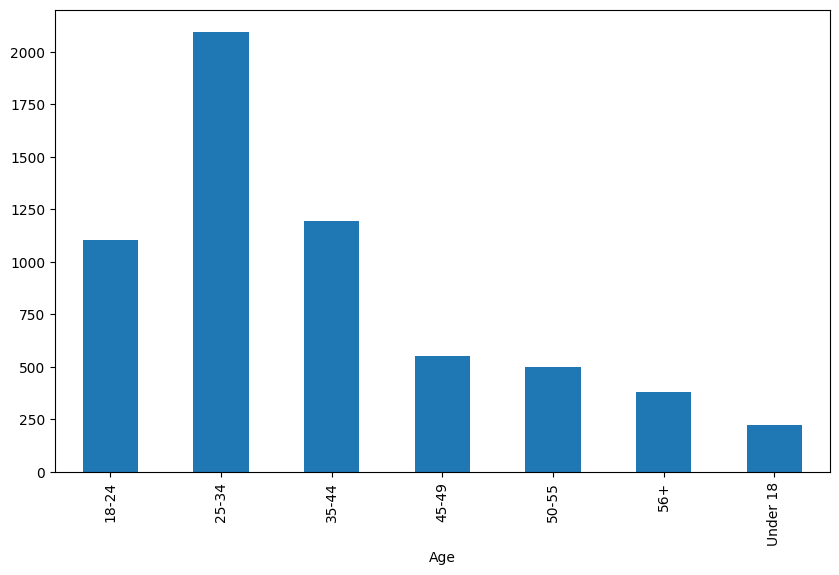

In [ ]:
plt.rcParams["figure.figsize"] = (10,6)
final_data.groupby("Age")["UserID"].nunique().plot(kind="bar")

- in DataSet : majority of the viewers are  in age group of 25-34
- out of all , 25-34 age group have rated and watched the maximum number of movies.
- for other age groups data are as below:

In [ ]:
final_data.groupby("Age")["MovieID"].nunique()

Age
18-24       3393
25-34       3508
35-44       3447
45-49       3288
50-55       3258
56+         2913
Under 18    2650
Name: MovieID, dtype: int64

<Axes: xlabel='Age'>

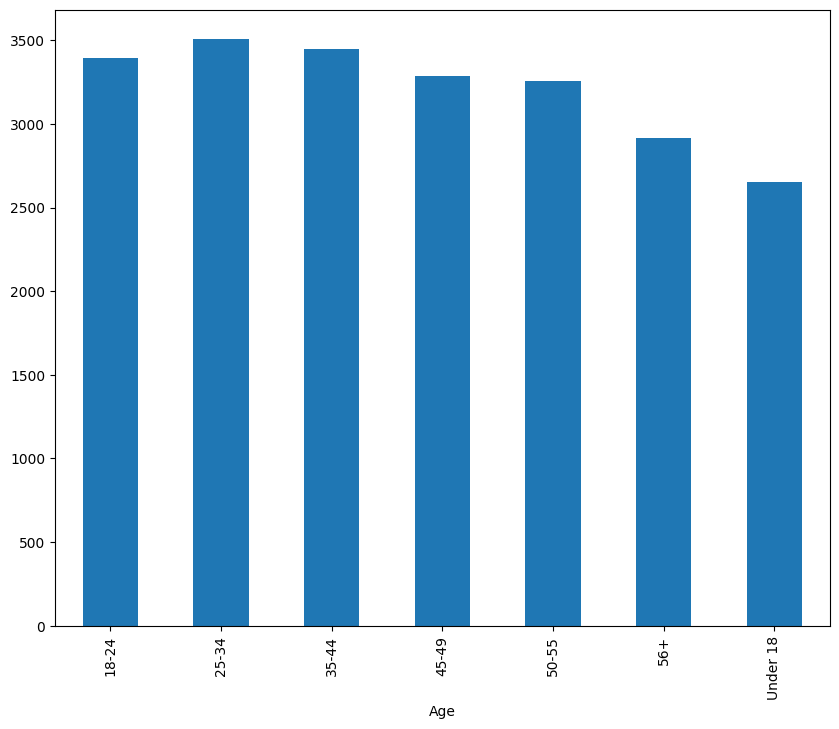

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
final_data.groupby("Age")["MovieID"].nunique().plot(kind="bar")

## Users belonging to which profession have watched and rated the most movies?



<Axes: xlabel='Occupation'>

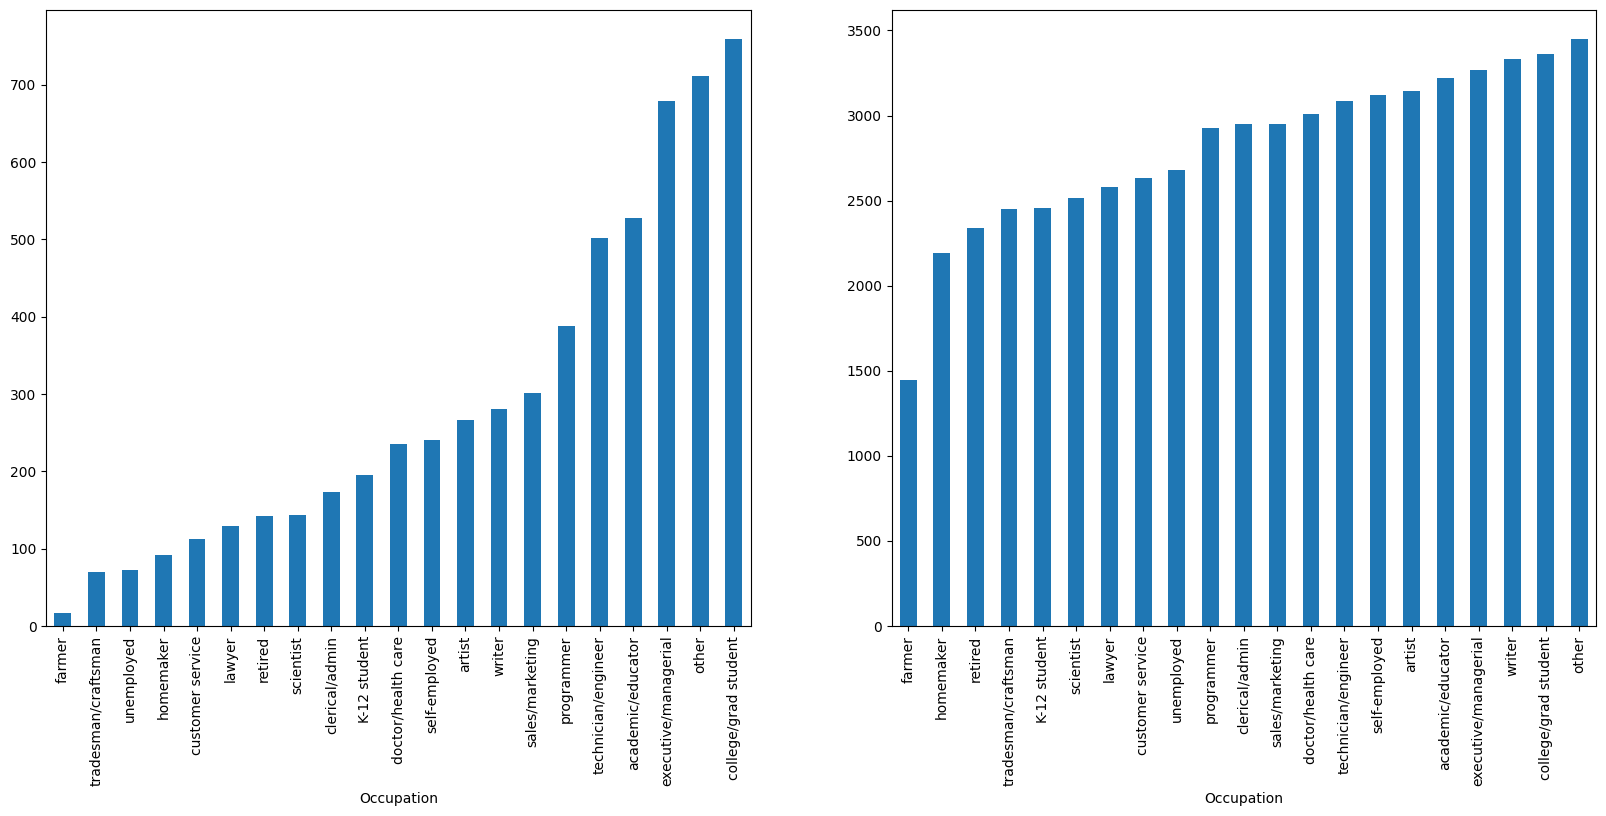

In [ ]:

plt.rcParams["figure.figsize"] = (20,8)

plt.subplot(121)
final_data.groupby("Occupation")["UserID"].nunique().sort_values().plot(kind="bar")
plt.subplot(122)
final_data.groupby("Occupation")["MovieID"].nunique().sort_values().plot(kind="bar")


- Majority of the Users are College Graduates and Students , followed by Executives, educators and engineers.
y of the Users are College Graduates and Students , followed by Executives, educators and engineers.
- Maximum movies are watched and rated by user's occupations are College graduate students , writers , executives, educator and artists.

In [ ]:
final_data.groupby("Occupation")["MovieID"].nunique().sort_values(ascending = False).head(6)

Occupation
other                   3448
college/grad student    3363
writer                  3330
executive/managerial    3269
academic/educator       3218
artist                  3145
Name: MovieID, dtype: int64

In [ ]:
final_data.columns

Index(['UserID', 'Gender', 'Age', 'Occupation', 'Zipcode', 'MovieID', 'Title', 'Release_year', 'Rating', 'Watch_Hour', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Other', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], dtype='object')

## Movie Recommendation based on Genres as per Majority Users occupation :     
- below table shows the rank preference of each occupation users:
- higher the number more prefered .

In [ ]:
## Movie Recommendation based on Genre as per Majority Users :

In [ ]:
r = ((final_data.groupby("Occupation")[['Action', 'Adventure', 'Animation', "Children's",
                                             'Comedy', 'Crime','Documentary', 'Drama', 'Fantasy',
                                             'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Other',
                                             'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].mean()) *100)
r = round(r,0).astype(int)

In [ ]:
r= r.loc[["writer","artist","academic/educator","executive/managerial","college/grad student"]]
r

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Other,Romance,Sci-Fi,Thriller,War,Western
Occupation,,,,,,,,,,,,,,,,,,,
writer,21,12,4,7,36,8,1,38,3,2,7,5,4,0,14,12,17,6,2
artist,23,12,4,7,36,8,1,38,3,2,7,5,4,0,15,13,17,5,2
academic/educator,22,12,4,7,35,7,1,40,3,2,6,5,4,0,16,12,17,6,2
executive/managerial,27,13,3,6,34,8,1,37,3,2,7,4,4,0,14,14,20,7,3
college/grad student,27,14,5,9,37,8,1,33,3,1,8,4,4,0,14,14,19,5,2


In [ ]:
a= np.argsort(r)
a

array([[13,  6,  9, 18,  8,  2, 12, 11, 17, 10,  3,  5,  1, 15, 14, 16,
         0,  4,  7],
       [13,  6,  9, 18,  8,  2, 12, 17, 11, 10,  3,  5,  1, 15, 14, 16,
         0,  4,  7],
       [13,  6,  9, 18,  8,  2, 12, 11, 17, 10,  5,  3,  1, 15, 14, 16,
         0,  4,  7],
       [13,  6,  9,  8, 18,  2, 11, 12,  3, 17, 10,  5,  1, 14, 15, 16,
         0,  4,  7],
       [13,  9,  6, 18,  8, 11, 12,  2, 17,  5, 10,  3,  1, 14, 15, 16,
         0,  7,  4]])

- Writers , artists and educator most preferes to watch Animation, Fantasy and Science Fiction movies, followed by Romance , Action and rest of the genres.

- COllege Students most prefer to watch Children's , Science Fiction, Romance and Fantasy movies.

- Film-Noir is more prefered by the educators and Executive occupation users.

## what is the traffic on OTT, based on watch hour :

<Axes: xlabel='Watch_Hour'>

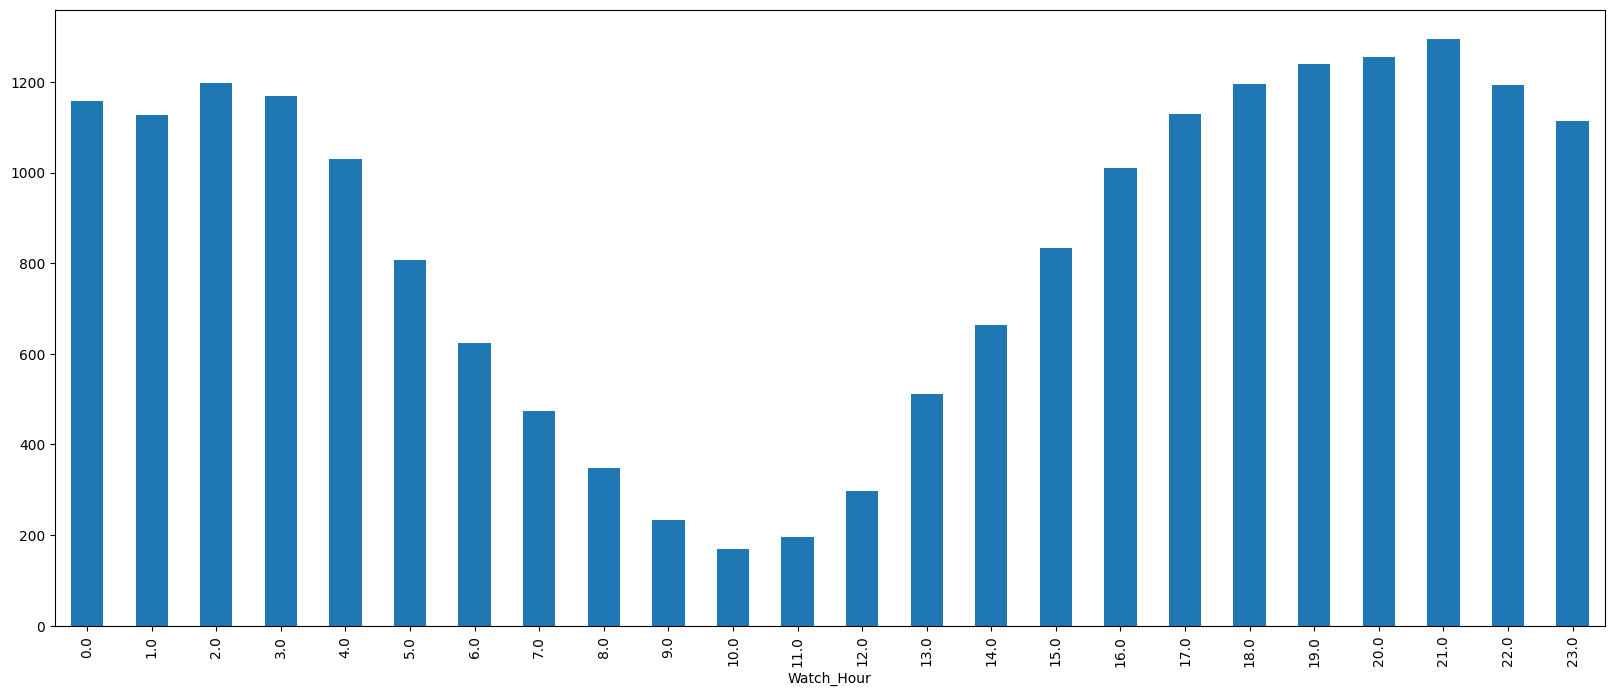

In [ ]:
final_data.groupby("Watch_Hour")["UserID"].nunique().plot(kind="bar")

## Top 10 Movies have got the most number of ratings :

In [ ]:
top10_movies = final_data.groupby("Title")["Rating"].count().reset_index().sort_values(by="Rating",ascending=False).head(10)

In [ ]:
top10_movies

,Title,Rating
127,American Beauty,3428
3261,Star Wars: Episode IV - A New Hope,2991
3262,Star Wars: Episode V - The Empire Strikes Back,2990
3263,Star Wars: Episode VI - Return of the Jedi,2883
1846,Jurassic Park,2672
2994,Saving Private Ryan,2653
3405,Terminator 2: Judgment Day,2649
2186,"Matrix, The",2590
262,Back to the Future,2583
3090,"Silence of the Lambs, The",2578


<Axes: xlabel='Rating', ylabel='Title'>

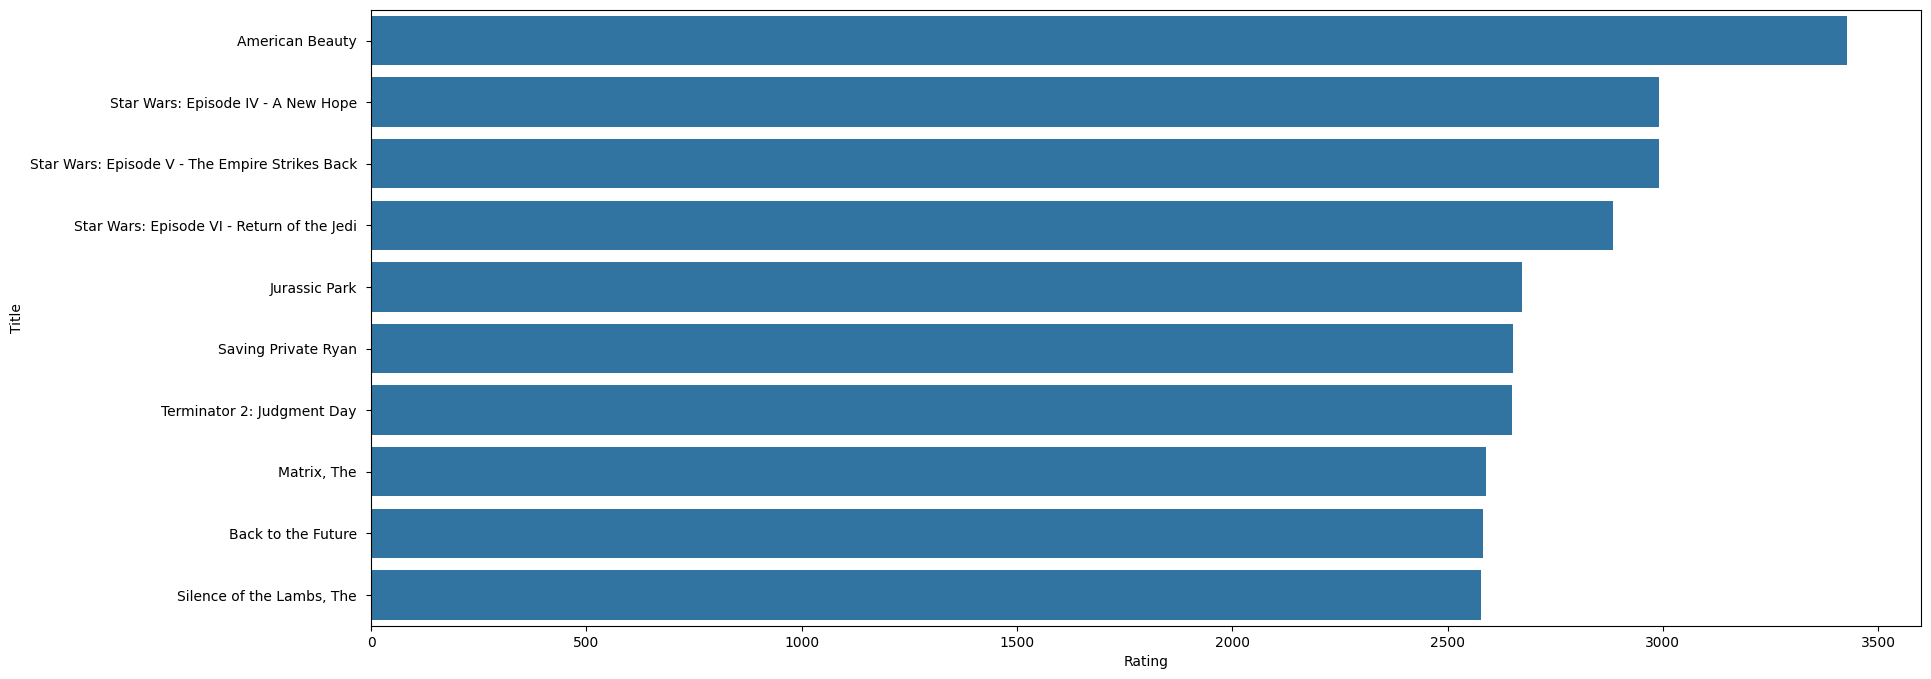

In [ ]:
sns.barplot(y = top10_movies["Title"],
            x = top10_movies["Rating"])

## 5 Top rated Recommended Movies per each genre :

In [ ]:
Genres = ['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime','Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Other','Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

for G in Genres:
  print(G)
  print("----------------------")
  print(final_data[final_data[G] == 1].groupby("Title")["Rating"].count().sort_values(ascending=False).head(5))
  print()
  print()
  print()

Action
----------------------
Title
Star Wars: Episode IV - A New Hope                 2991
Star Wars: Episode V - The Empire Strikes Back     2990
Star Wars: Episode VI - Return of the Jedi         2883
Jurassic Park                                      2672
Saving Private Ryan                                2653
Name: Rating, dtype: int64



Adventure
----------------------
Title
Star Wars: Episode IV - A New Hope                 2991
Star Wars: Episode V - The Empire Strikes Back     2990
Star Wars: Episode VI - Return of the Jedi         2883
Jurassic Park                                      2672
Men in Black                                       2538
Name: Rating, dtype: int64



Animation
----------------------
Title
Toy Story                    2077
Who Framed Roger Rabbit?     1799
Bug's Life, A                1703
Toy Story 2                  1585
Aladdin                      1351
Name: Rating, dtype: int64



Children's
----------------------
Title
E.T. the Extra-Terrestrial

# Top 5 movie recommended as per age_Group based on ratings each age group provided

In [ ]:
age_groups = final_data.Age.unique()

In [ ]:
for age_ in age_groups:
  print(age_)
  print("------")
  print(final_data[final_data.Age == age_].groupby("Title")["Rating"].count().sort_values(ascending=False).head())
  print()
  print()
  print()

Under 18
------
Title
Toy Story                                      112
Sixth Sense, The                               109
Star Wars: Episode IV - A New Hope             101
Men in Black                                   100
Star Wars: Episode VI - Return of the Jedi     100
Name: Rating, dtype: int64



56+
------
Title
American Beauty         184
Schindler's List        137
Shakespeare in Love     136
Godfather, The          122
Saving Private Ryan     121
Name: Rating, dtype: int64



25-34
------
Title
American Beauty                                    1334
Star Wars: Episode V - The Empire Strikes Back     1176
Star Wars: Episode VI - Return of the Jedi         1134
Star Wars: Episode IV - A New Hope                 1128
Terminator 2: Judgment Day                         1087
Name: Rating, dtype: int64



45-49
------
Title
American Beauty                                    258
Star Wars: Episode IV - A New Hope                 243
Star Wars: Episode V - The Empire Strikes Back  

## Creating a user Movie average rating Matrix :

In [ ]:
df_.columns


Index(['UserID', 'Gender', 'Age', 'Occupation', 'Zipcode', 'MovieID', 'Title', 'Genres', 'Release_year', 'Rating', 'Watch_Hour', 'Released_In'], dtype='object')

In [ ]:
user_movie_rating_matrix = pd.pivot_table(df_,index = "UserID",
               columns = "Title",
               values = "Rating",
               aggfunc = "mean").fillna(0)
user_movie_rating_matrix.shape

(6040, 3633)

In [ ]:
user_movie_rating_matrix

Title,"$1,000,000 Duck",'Night Mother,'Til There Was You,"'burbs, The",...And Justice for All,1-900,10 Things I Hate About You,101 Dalmatians,12 Angry Men,"13th Warrior, The",187,2 Days in the Valley,20 Dates,"20,000 Leagues Under the Sea",200 Cigarettes,2001: A Space Odyssey,2010,24 7: Twenty Four Seven,24-hour Woman,28 Days,3 Ninjas: High Noon On Mega Mountain,3 Strikes,"301, 302","39 Steps, The","400 Blows, The",42 Up,52 Pick-Up,54,"7th Voyage of Sinbad, The",8 1/2,8 1/2 Women,8 Heads in a Duffel Bag,8 Seconds,8MM,A Chef in Love,Abbott and Costello Meet Frankenstein,"Abominable Snowman, The",About Adam,About Last Night...,Above the Rim,"Absent Minded Professor, The",Absolute Power,"Abyss, The",Ace Ventura: Pet Detective,Ace Ventura: When Nature Calls,Aces: Iron Eagle III,"Acid House, The",Across the Sea of Time,Action Jackson,"Actor's Revenge, An",Addams Family Values,"Addams Family, The",Addicted to Love,"Addiction, The",Adrenalin: Fear the Rush,Adventures in Babysitting,"Adventures of Elmo in Grouchland, The","Adventures of Milo and Otis, The","Adventures of Pinocchio, The","Adventures of Priscilla, Queen of the Desert, The","Adventures of Robin Hood, The","Adventures of Rocky and Bullwinkle, The","Adventures of Sebastian Cole, The","Affair of Love, An","Affair to Remember, An",Affliction,"African Queen, The",After Life,Afterglow,Against All Odds,"Age of Innocence, The",Agnes Browne,Agnes of God,Aimée & Jaguar,Aiqing wansui,Air America,Air Bud,Air Bud: Golden Receiver,Air Force One,"Air Up There, The",Airheads,Airplane II: The Sequel,Airplane!,Airport,Airport '77,Airport 1975,Akira,Aladdin,Aladdin and the King of Thieves,"Alan Smithee Film: Burn Hollywood Burn, An","Alarmist, The",Alaska,Albino Alligator,Algiers,Alice and Martin,Alice in Wonderland,Alien,Alien Escape,Alien Nation,Alien: Resurrection,Aliens,Alien³,Alive,All About Eve,All About My Mother,All Dogs Go to Heaven,All Dogs Go to Heaven 2,All Over Me,All Quiet on the Western Front,All That Jazz,All Things Fair,All the King's Men,All the Rage,All the Vermeers in New York,Allan Quartermain and the Lost City of Gold,"Alley Cats, The",Alligator,"Allnighter, The",Almost Famous,Almost Heroes,Alphaville,Alvarez Kelly,Amadeus,Amateur,"Amazing Panda Adventure, The",American Beauty,American Buffalo,American Dream,American Flyers,American Gigolo,American Graffiti,American History X,American Movie,American Pie,American Pimp,American Pop,"American President, The",American Psycho,American Strays,"American Tail, An","American Tail: Fievel Goes West, An","American Werewolf in London, An","American Werewolf in Paris, An","American in Paris, An",Amistad,Amityville 1992: It's About Time,Amityville 3-D,"Amityville Curse, The","Amityville Horror, The",Amityville II: The Possession,Amityville: A New Generation,Amityville: Dollhouse,Among Giants,Amos & Andrew,An Unforgettable Summer,Anaconda,Analyze This,Anastasia,Anatomy,Anatomy of a Murder,Anchors Aweigh,And God Created Woman,And Now for Something Completely Different,And the Band Played On,And the Ship Sails On,Andre,Angel Baby,Angel Heart,Angel and the Badman,Angel on My Shoulder,Angela,Angela's Ashes,Angels and Insects,Angels in the Outfield,Angus,Animal House,Anna,Anna Karenina,Anna and the King,Anne Frank Remembered,Annie Hall,Another Day in Paradise,Another Man's Poison,Another Stakeout,Antonia's Line,Antz,Any Given Sunday,Anywhere But Here,Aparajito,"Apartment, The","Ape, The",Apocalypse Now,Apollo 13,"Apostle, The","Apple Dumpling Gang Rides Again, The","Apple Dumpling Gang, The","Apple, The",April Fool's Day,Apt Pupil,Arachnophobia,Arguing the World,"Aristocats, The",Arlington Road,Armageddon,Armed and Dangerous,Army of Darkness,Around the World in 80 Days,"Arrival, The",Arsenic and Old Lace,"Art of War, The",Artemisia,Arthur,As Good As It Gets,Ashes of Time,"Asphalt Jungle, The",Assassination,Assassins,Assault on Precinct 13,"Assignment, The","Associate, The","Astronaut's Wife, The",Asylum,At First Sight,Atlantic City,Attac

## item item similarity(hamming distance) based recommendation :

In [ ]:
m = movies[["MovieID","Title","Genres"]]
m["Genres"] = m["Genres"].str.split("|")
m = m.explode("Genres")
m["Genres"] = m["Genres"].replace({"":"Other","Horro":"Horror","Sci-":"Sci-Fi","Sci":"Sci-Fi","Sci-F":"Sci-Fi","Dr":"Drama","Documenta":"Documentary",
                     "Wester":"Western","Fant":"Fantasy","Chil":"Children's","R":"Romance","D":"Drama","Rom":"Romance","Animati":"Animation","Childr":"Children's","Childre":"Children's",
                     "Fantas":"Fantasy","Come":"Comedy","Dram":"Drama","S":"Sci-Fi","Roma":"Romance","A":"Adventure","Children":"Children's","Adventu":"Adventure","Adv":"Adventure",
                      "Wa":"War","Thrille"  :"Thriller","Com":"Comedy","Comed":"Comedy","Acti":"Action","Advent":"Adventure","Adventur":"Adventure","Thri":"Thriller",
                        "Chi":"Children's","Ro":"Romance","F":"Fantasy","We":"Western","Documen":"Documentary","Music":"Musical","Children":"Children's" ,"Horr":"Horror",
                     "Children'":"Children's","Roman":"Romance","Docu":"Documentary","Th":"Thriller","Document":"Documentary"
                    })

m = m.pivot_table(values="Title", index="MovieID", columns="Genres", aggfunc= np.size,).fillna(0)


def apply(x):
  if x >= 1:
    return 1
  else:
    return 0

m["Adventure"] = m["Adventure"].apply(apply)
m = m.astype(int)

In [ ]:
m

Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Other,Romance,Sci-Fi,Thriller,War,Western
MovieID,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
100,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
996,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
997,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [ ]:

def Hamming_distance(x1,x2):
  return np.sum(abs(x1-x2))

Ranks = []
Query = "1"
for candidate in m.index:
  if candidate == Query:
    continue
  Ranks.append([Query,candidate,Hamming_distance(m.loc[Query],m.loc[candidate])])

Ranks = pd.DataFrame(Ranks,columns=["Query","Candidate","Hamming_distance"])
Ranks = Ranks.merge(movies[['MovieID', 'Title']], left_on='Query', right_on='MovieID').rename(columns={'Title': 'query_tittle'}).drop(columns=['MovieID'])
Ranks = Ranks.merge(movies[['MovieID', 'Title']], left_on='Candidate', right_on='MovieID').rename(columns={'Title': 'candidate_tittle'}).drop(columns=['MovieID'])
Ranks = Ranks.sort_values(by=['Query', 'Hamming_distance'])




Ranks.head(10)


,Query,Candidate,Hamming_distance,query_tittle,candidate_tittle
71,1,1064,0,Toy Story,Aladdin and the King of Thieves
1208,1,2141,0,Toy Story,"American Tail, An"
1442,1,2354,0,Toy Story,"Rugrats Movie, The"
1443,1,2355,0,Toy Story,"Bug's Life, A"
2281,1,3114,0,Toy Story,Toy Story 2
2831,1,3611,0,Toy Story,Saludos Amigos
2981,1,3751,0,Toy Story,Chicken Run
7,1,1005,1,Toy Story,D3: The Mighty Ducks
13,1,1010,1,Toy Story,"Love Bug, The"
19,1,1016,1,Toy Story,"Shaggy Dog, The"


In [ ]:

def Hamming_distance(x1,x2):
  return np.sum(abs(x1-x2))

Ranks = []
Query = "1485"
for candidate in m.index:
  if candidate == Query:
    continue
  Ranks.append([Query,candidate,Hamming_distance(m.loc[Query],m.loc[candidate])])

Ranks = pd.DataFrame(Ranks,columns=["Query","Candidate","Hamming_distance"])
Ranks = Ranks.merge(movies[['MovieID', 'Title']], left_on='Query', right_on='MovieID').rename(columns={'Title': 'query_tittle'}).drop(columns=['MovieID'])
Ranks = Ranks.merge(movies[['MovieID', 'Title']], left_on='Candidate', right_on='MovieID').rename(columns={'Title': 'candidate_tittle'}).drop(columns=['MovieID'])
Ranks = Ranks.sort_values(by=['Query', 'Hamming_distance'])




Ranks.head(10)


,Query,Candidate,Hamming_distance,query_tittle,candidate_tittle
4,1485,1001,0,Liar Liar,"Associate, The"
5,1485,1002,0,Liar Liar,Ed's Next Move
13,1485,101,0,Liar Liar,Bottle Rocket
24,1485,102,0,Liar Liar,Mr. Wrong
25,1485,1020,0,Liar Liar,Cool Runnings
46,1485,104,0,Liar Liar,Happy Gilmore
49,1485,1042,0,Liar Liar,That Thing You Do!
82,1485,1075,0,Liar Liar,"Sexual Life of the Belgians, The"
86,1485,1079,0,Liar Liar,"Fish Called Wanda, A"
88,1485,1080,0,Liar Liar,Monty Python's Life of Brian


In [ ]:
movies = pd.read_fwf("zee-movies.dat",encoding="ISO-8859-1")
ratings =pd.read_fwf("zee-ratings.dat",encoding="ISO-8859-1")
users = pd.read_fwf("zee-users.dat",encoding="ISO-8859-1")

delimiter ="::"

users = users["UserID::Gender::Age::Occupation::Zip-code"].str.split(delimiter,expand = True)
users.columns = ["UserID","Gender","Age","Occupation","Zipcode"]

users["Age"].replace({"1": "Under 18","18": "18-24","25": "25-34",
                          "35": "35-44","45": "45-49","50": "50-55","56": "56+"},inplace=True)

users["Occupation"] = users["Occupation"].astype(int).replace({0: "other",1: "academic/educator",2: "artist",
                                                               3: "clerical/admin",4: "college/grad student",
                                             5: "customer service",6: "doctor/health care",7: "executive/managerial",
                                             8: "farmer" ,9: "homemaker",10: "K-12 student",11: "lawyer",
                                             12: "programmer",13: "retired",14: "sales/marketing",15: "scientist",
                                             16: "self-employed",17: "technician/engineer",
                                             18: "tradesman/craftsman",19: "unemployed",20: "writer"},
                                            )

delimiter ="::"

ratings = ratings["UserID::MovieID::Rating::Timestamp"].str.split(delimiter,expand = True)
ratings.columns = ["UserID","MovieID","Rating","Timestamp"]


movies.drop(["Unnamed: 1","Unnamed: 2"],axis = 1,inplace=True)

delimiter ="::"

movies = movies["Movie ID::Title::Genres"].str.split(delimiter,expand = True)
movies.columns = ["MovieID","Title","Genres"]

movies.shape,ratings.shape,users.shape

movies["Release_year"] = movies["Title"].str.extract('^(.+)\s\(([0-9]*)\)$',expand = True)[1]
movies["Title"] = movies["Title"].str.split("(").apply(lambda x:x[0])

from datetime import datetime
ratings["Watch_Hour"] =ratings["Timestamp"].apply(lambda x:datetime.fromtimestamp(int(x)).hour)
ratings.drop(["Timestamp"],axis = 1,inplace=True)

df = users.merge(movies.merge(ratings,on="MovieID",how="outer"),on="UserID",how="outer")
df["Genres"] = df["Genres"].str.split("|")
df = df.explode('Genres')

df["Genres"] = df["Genres"].replace({"":"Other","Horro":"Horror","Sci-":"Sci-Fi","Sci":"Sci-Fi","Sci-F":"Sci-Fi","Dr":"Drama","Documenta":"Documentary",
                     "Wester":"Western","Fant":"Fantasy","Chil":"Children's","R":"Romance","D":"Drama","Rom":"Romance","Animati":"Animation","Childr":"Children's","Childre":"Children's",
                     "Fantas":"Fantasy","Come":"Comedy","Dram":"Drama","S":"Sci-Fi","Roma":"Romance","A":"Adventure","Children":"Children's","Adventu":"Adventure","Adv":"Adventure",
                      "Wa":"War","Thrille"  :"Thriller","Com":"Comedy","Comed":"Comedy","Acti":"Action","Advent":"Adventure","Adventur":"Adventure","Thri":"Thriller",
                        "Chi":"Children's","Ro":"Romance","F":"Fantasy","We":"Western","Documen":"Documentary","Music":"Musical","Children":"Children's" ,"Horr":"Horror",
                     "Children'":"Children's","Roman":"Romance","Docu":"Documentary","Th":"Thriller","Document":"Documentary"
                    })
m = df.groupby(['MovieID','Genres'])['Title'].unique().str[0].unstack().reset_index().set_index('MovieID')
m = ~m.isna()
m = m.astype(int)


## Cosine Similarity :

## Item and User :  -Cosine similarity Matrix :

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
Item_similarity = cosine_similarity(user_movie_rating_matrix.T)
Item_similarity

array([[1.        , 0.07235746, 0.03701053, ..., 0.        , 0.12024178,
        0.02700277],
       [0.07235746, 1.        , 0.11528952, ..., 0.        , 0.        ,
        0.07780705],
       [0.03701053, 0.11528952, 1.        , ..., 0.        , 0.04752635,
        0.0632837 ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.04564448],
       [0.12024178, 0.        , 0.04752635, ..., 0.        , 1.        ,
        0.04433508],
       [0.02700277, 0.07780705, 0.0632837 , ..., 0.04564448, 0.04433508,
        1.        ]])

In [ ]:
Item_similarity.shape

(3633, 3633)

In [ ]:
Item_similarty_matrix = pd.DataFrame(Item_similarity,
             index = user_movie_rating_matrix.columns,
             columns = user_movie_rating_matrix.columns)
Item_similarty_matrix


Title,"$1,000,000 Duck",'Night Mother,'Til There Was You,"'burbs, The",...And Justice for All,1-900,10 Things I Hate About You,101 Dalmatians,12 Angry Men,"13th Warrior, The",187,2 Days in the Valley,20 Dates,"20,000 Leagues Under the Sea",200 Cigarettes,2001: A Space Odyssey,2010,24 7: Twenty Four Seven,24-hour Woman,28 Days,3 Ninjas: High Noon On Mega Mountain,3 Strikes,"301, 302","39 Steps, The","400 Blows, The",42 Up,52 Pick-Up,54,"7th Voyage of Sinbad, The",8 1/2,8 1/2 Women,8 Heads in a Duffel Bag,8 Seconds,8MM,A Chef in Love,Abbott and Costello Meet Frankenstein,"Abominable Snowman, The",About Adam,About Last Night...,Above the Rim,"Absent Minded Professor, The",Absolute Power,"Abyss, The",Ace Ventura: Pet Detective,Ace Ventura: When Nature Calls,Aces: Iron Eagle III,"Acid House, The",Across the Sea of Time,Action Jackson,"Actor's Revenge, An",Addams Family Values,"Addams Family, The",Addicted to Love,"Addiction, The",Adrenalin: Fear the Rush,Adventures in Babysitting,"Adventures of Elmo in Grouchland, The","Adventures of Milo and Otis, The","Adventures of Pinocchio, The","Adventures of Priscilla, Queen of the Desert, The","Adventures of Robin Hood, The","Adventures of Rocky and Bullwinkle, The","Adventures of Sebastian Cole, The","Affair of Love, An","Affair to Remember, An",Affliction,"African Queen, The",After Life,Afterglow,Against All Odds,"Age of Innocence, The",Agnes Browne,Agnes of God,Aimée & Jaguar,Aiqing wansui,Air America,Air Bud,Air Bud: Golden Receiver,Air Force One,"Air Up There, The",Airheads,Airplane II: The Sequel,Airplane!,Airport,Airport '77,Airport 1975,Akira,Aladdin,Aladdin and the King of Thieves,"Alan Smithee Film: Burn Hollywood Burn, An","Alarmist, The",Alaska,Albino Alligator,Algiers,Alice and Martin,Alice in Wonderland,Alien,Alien Escape,Alien Nation,Alien: Resurrection,Aliens,Alien³,Alive,All About Eve,All About My Mother,All Dogs Go to Heaven,All Dogs Go to Heaven 2,All Over Me,All Quiet on the Western Front,All That Jazz,All Things Fair,All the King's Men,All the Rage,All the Vermeers in New York,Allan Quartermain and the Lost City of Gold,"Alley Cats, The",Alligator,"Allnighter, The",Almost Famous,Almost Heroes,Alphaville,Alvarez Kelly,Amadeus,Amateur,"Amazing Panda Adventure, The",American Beauty,American Buffalo,American Dream,American Flyers,American Gigolo,American Graffiti,American History X,American Movie,American Pie,American Pimp,American Pop,"American President, The",American Psycho,American Strays,"American Tail, An","American Tail: Fievel Goes West, An","American Werewolf in London, An","American Werewolf in Paris, An","American in Paris, An",Amistad,Amityville 1992: It's About Time,Amityville 3-D,"Amityville Curse, The","Amityville Horror, The",Amityville II: The Possession,Amityville: A New Generation,Amityville: Dollhouse,Among Giants,Amos & Andrew,An Unforgettable Summer,Anaconda,Analyze This,Anastasia,Anatomy,Anatomy of a Murder,Anchors Aweigh,And God Created Woman,And Now for Something Completely Different,And the Band Played On,And the Ship Sails On,Andre,Angel Baby,Angel Heart,Angel and the Badman,Angel on My Shoulder,Angela,Angela's Ashes,Angels and Insects,Angels in the Outfield,Angus,Animal House,Anna,Anna Karenina,Anna and the King,Anne Frank Remembered,Annie Hall,Another Day in Paradise,Another Man's Poison,Another Stakeout,Antonia's Line,Antz,Any Given Sunday,Anywhere But Here,Aparajito,"Apartment, The","Ape, The",Apocalypse Now,Apollo 13,"Apostle, The","Apple Dumpling Gang Rides Again, The","Apple Dumpling Gang, The","Apple, The",April Fool's Day,Apt Pupil,Arachnophobia,Arguing the World,"Aristocats, The",Arlington Road,Armageddon,Armed and Dangerous,Army of Darkness,Around the World in 80 Days,"Arrival, The",Arsenic and Old Lace,"Art of War, The",Artemisia,Arthur,As Good As It Gets,Ashes of Time,"Asphalt Jungle, The",Assassination,Assassins,Assault on Precinct 13,"Assignment, The","Associate, The","Astronaut's Wife, The",Asylum,At First Sight,Atlantic City,Attac

## User Based Similartiy :


In [ ]:
User_similarity = cosine_similarity(user_movie_rating_matrix)
User_similarity.shape

(6040, 6040)

In [ ]:
User_similarity

array([[1.        , 0.25531859, 0.12396703, ..., 0.15926709, 0.11935626,
        0.12239079],
       [0.25531859, 1.        , 0.25964457, ..., 0.16569953, 0.13332665,
        0.24845029],
       [0.12396703, 0.25964457, 1.        , ..., 0.20430203, 0.11352239,
        0.30693676],
       ...,
       [0.15926709, 0.16569953, 0.20430203, ..., 1.        , 0.18657496,
        0.18563871],
       [0.11935626, 0.13332665, 0.11352239, ..., 0.18657496, 1.        ,
        0.10827118],
       [0.12239079, 0.24845029, 0.30693676, ..., 0.18563871, 0.10827118,
        1.        ]])

In [ ]:
User_similarity_matrix = pd.DataFrame(User_similarity,
             index = user_movie_rating_matrix.index,
             columns = user_movie_rating_matrix.index)
User_similarity_matrix


UserID,1,10,100,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,101,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,102,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,103,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,104,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,105,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,106,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,107,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,108,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,109,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,11,110,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,111,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,112,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,113,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,114,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,115,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,116,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,117,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,118,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,119,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,12,120,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,121,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,122,1220,1221,1222,...,774,775,776,777,778,779,78,780,781,782,783,784,785,786,787,788,789,79,790,791,792,793,794,795,796,797,798,799,8,80,800,801,802,803,804,805,806,807,808,809,81,810,811,812,813,814,815,816,817,818,819,82,820,821,822,823,824,825,826,827,828,829,83,830,831,832,833,834,835,836,837,838,839,84,840,841,842,843,844,845,846,847,848,849,85,850,851,852,853,854,855,856,857,858,859,86,860,861,862,863,864,865,866,867,868,869,87,870,871,872,873,874,875,876,877,878,879,88,880,881,882,883,884,885,886,887,888,889,89,890,891,892,893,894,895,896,897,898,899,9,90,900,901,902,903,904,905,906,907,908,909,91,910,911,912,913,914,915,916,917,918,919,92,920,921,922,923,924,925,926,927,928,929,93,930,931,932,933,934,935,936,937,938,939,94,940,941,942,943,944,945,946,947,948,949,95,950,951,952,953,954,955,956,957,958,959,96,960,961,962,963,964,965,966,967,968,969,97,970,971,972,973,974,975,976,977,978,979,98,980,981,982,983,984,985,986,987,988,989,99,990,991,992,993,994,995,996,997,998,999
UserID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.255319,0.123967,0.207800,0.139317,0.110320,0.121384,0.180226,0.103896,0.052816,0.060032,0.102675,0.049839,0.029990,0.159501,0.078094,0.080898,0.047769,0.200658,0.176683,0.133068,0.150068,0.178819,0.112961,0.120931,0.034848,0.090596,0.122459,0.099425,0.022982,0.028506,0.004729,0.143985,0.045708,0.190085,0.032611,0.045869,0.058103,0.181461,0.031990,0.190718,0.136573,0.136320,0.022805,0.179369,0.030367,0.047547,0.174466,0.045860,0.078895,0.080179,0.145644,0.058044,0.025677,0.143176,0.152371,0.065484,0.096093,0.136584,0.249175,0.056333,0.047627,0.048912,0.141898,0.063464,0.213323,0.121773,0.212036,0.046163,0.000000,0.177514,0.154164,0.101579,0.120265,0.026398,0.096707,0.117825,0.243642,0.031668,0.121046,0.044692,0.072133,0.234492,0.066364,0.242078,0.056160,0.094713,0.111861,0.028193,0.127071,0.048974,0.037150,0.072177,0.116982,0.028312,0.104485,0.080465,0.163938,0.266903,0.216087,0.052736,0.173273,0.159892,0.019889,0.266416,0.089634,0.213468,0.125720,0.138806,0.082738,0.114801,0.076918,0.130446,0.041797,0.155059,0.169026,0.010792,0.036791,0.101594,0.131766,0.056594,0.111403,0.052133,0.104435,0.071828,0.084211,0.049741,0.301086,0.113393,0.074280,0.116934,0.117687,0.192426,0.056207,0.142759,0.161777,0.243457,0.103265,0.053835,0.000000,0.176430,0.194446,0.155407,

In [ ]:
m


Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Other,Romance,Sci-Fi,Thriller,War,Western
MovieID,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
100,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
996,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
997,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


## Pearson Correlation



In [ ]:
correlated_movie_matrix = m.T.corr()

In [ ]:
correlated_movie_matrix

MovieID,1,10,100,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,101,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,102,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,103,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,104,1040,1041,1042,1043,1044,1045,1046,1047,1049,105,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,106,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,107,1070,1071,1073,1075,1076,1077,1078,1079,108,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,109,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,11,110,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,111,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,112,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,113,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,114,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,115,1151,1152,1153,1154,1155,1156,1157,1158,1159,116,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,117,1170,1171,1172,1173,1174,1175,1177,1178,1179,118,1180,1181,1183,1184,1185,1186,1187,1188,1189,119,1190,1191,1192,1193,1194,1196,1197,1198,1199,12,120,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,121,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,122,1220,1221,1222,1223,1224,1225,1226,1227,1228,123,...,769,77,770,771,772,773,774,775,776,777,778,779,78,780,781,782,783,784,785,786,787,788,789,79,790,791,792,794,795,796,798,799,8,80,800,801,802,803,804,805,806,807,808,809,81,810,811,812,813,814,815,816,818,819,82,820,821,822,823,824,825,826,827,828,829,83,830,831,832,833,834,835,836,837,838,839,84,840,841,842,843,844,845,846,847,848,849,85,850,851,852,853,854,855,856,857,858,859,86,860,861,862,863,864,865,866,867,868,869,87,870,871,872,873,874,875,876,877,878,879,88,880,881,882,884,885,886,887,888,889,89,890,891,892,893,894,895,896,897,898,899,9,90,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,92,920,921,922,923,924,925,926,927,928,929,93,930,931,932,933,934,935,936,937,938,939,94,940,941,942,943,944,945,946,947,948,949,95,950,951,952,953,954,955,956,957,958,959,96,960,961,962,963,964,965,966,967,968,969,97,970,971,972,973,974,975,976,977,978,979,98,980,981,982,983,984,985,986,987,988,989,99,990,991,992,993,994,996,997,998,999
MovieID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.187500,-0.148522,-0.102062,0.544331,0.544331,-0.148522,-0.148522,0.792118,-0.102062,0.604167,-0.102062,0.208333,0.544331,0.792118,0.604167,0.321798,0.321798,0.604167,0.321798,0.792118,0.321798,0.604167,0.208333,0.544331,0.544331,0.792118,0.604167,0.792118,0.604167,0.792118,0.321798,-0.102062,0.604167,0.604167,-0.102062,0.484481,0.208333,0.604167,0.792118,-0.102062,-0.102062,-0.148522,-0.187500,-0.102062,-0.102062,0.544331,-0.102062,-0.102062,0.544331,-0.148522,-0.102062,0.321798,-0.148522,-0.148522,-0.148522,-0.148522,-0.148522,-0.102062,-0.102062,-0.148522,-0.102062,-0.102062,-0.102062,0.208333,-0.102062,-0.148522,0.321798,0.321798,-0.148522,-0.102062,-0.102062,1.000000,-0.102062,0.208333,0.208333,-0.148522,-0.148522,0.484481,-0.102062,-0.148522,0.321798,0.544331,-0.102062,0.321798,0.321798,0.544331,-0.102062,0.544331,0.321798,-0.102062,0.321798,-0.148522,-0.148522,-0.148522,-0.102062,-0.148522,-0.148522,0.544331,-0.148522,0.544331,-0.148522,-0.148522,-0.187500,-0.102062,-0.102062,0.130437,0.544331,-0.102062,0.208333,-0.187500,-0.148522,-0.148522,-0.102062,-0.102062,-0.102062,-0.102062,-0.102062,0.544331,-0.102062,-0.102062,-0.148522,-0.102062,-0.102062,-0.148522,0.544331,-0.102062,0.321798,-0.102062,-0.102062,-0.148522,-0.102062,-0.187500,-0.102062,-0.

In [ ]:
movies[movies.MovieID == "1"]["Title"][0]

'Toy Story '

In [ ]:
movies[movies.Title.str.contains("Toy Story")].iloc[0].MovieID

'1'

In [ ]:
def recommend_movie_based_on_correlation(movie):
    TITLE = movies[movies.Title.str.contains(movie)].iloc[0]["Title"]

    INDEX = movies[movies.Title.str.contains(movie)].iloc[0].MovieID

    print(TITLE)
    print(INDEX)

    print(movies[movies.MovieID.isin(correlated_movie_matrix[INDEX].sort_values(ascending=False).head(10).index.to_list())]["Title"])

In [ ]:
recommend_movie_based_on_correlation("Toy Story")

Toy Story 
1
0                             Toy Story 
584                             Aladdin 
1050    Aladdin and the King of Thieves 
2009                   Jungle Book, The 
2072                  American Tail, An 
2285                 Rugrats Movie, The 
2286                      Bug's Life, A 
3045                        Toy Story 2 
3542                     Saludos Amigos 
3682                        Chicken Run 
Name: Title, dtype: object


In [ ]:
recommend_movie_based_on_correlation("Shawshank")

Shawshank Redemption, The 
318
35             Dead Man Walking 
384                   Boys Life 
631                       Frisk 
1555               Career Girls 
2443    Ballad of Narayama, The 
2451                    Airport 
2452               Airport 1975 
2453                Airport '77 
3525               Center Stage 
3529                     Hamlet 
Name: Title, dtype: object


In [ ]:
recommend_movie_based_on_correlation("Titanic")

Titanic 
1721
200                  Total Eclipse 
357         It Could Happen to You 
1372                 Jerry Maguire 
1466         Inventing the Abbotts 
1951            Dangerous Liaisons 
2106                       Déjà Vu 
2247               Practical Magic 
2850    Year of Living Dangerously 
3086             Anna and the King 
3599              Romeo and Juliet 
Name: Title, dtype: object


In [ ]:
recommend_movie_based_on_correlation("Braveheart")

Braveheart 
110
461            Heaven & Earth 
1204        Full Metal Jacket 
1214                Boat, The 
1222                    Glory 
1959      Saving Private Ryan 
2358       Thin Red Line, The 
2993         Longest Day, The 
3559            Flying Tigers 
3574    Fighting Seabees, The 
3585    Guns of Navarone, The 
Name: Title, dtype: object


# k - Nearest Neighbours

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
kNN_model = NearestNeighbors(metric='cosine')
kNN_model.fit(user_movie_rating_matrix.T)

NearestNeighbors(metric='cosine')

In [ ]:
distances, indices = kNN_model.kneighbors(user_movie_rating_matrix.T, n_neighbors= 5)

In [ ]:
result = pd.DataFrame(indices)
result

,0,1,2,3,4
0,0,731,414,285,582
1,1,803,72,2162,3029
2,2,1622,2524,3313,2583
3,3,1452,2164,1304,1043
4,4,26,723,890,493
...,...,...,...,...,...
3628,3628,2548,750,1582,2439
3629,3629,382,1699,482,1578
3630,3630,1328,1687,3393,2922
3631,3631,1609,1176,3225,2093


In [ ]:
result.index = user_movie_rating_matrix.columns
result


,0,1,2,3,4
Title,,,,,
"$1,000,000 Duck",0,731,414,285,582
'Night Mother,1,803,72,2162,3029
'Til There Was You,2,1622,2524,3313,2583
"'burbs, The",3,1452,2164,1304,1043
...And Justice for All,4,26,723,890,493
...,...,...,...,...,...
"Zed & Two Noughts, A",3628,2548,750,1582,2439
Zero Effect,3629,382,1699,482,1578
Zero Kelvin,3630,1328,1687,3393,2922


In [ ]:
 result.loc["Zero Effect "].to_list()

[3629, 382, 1699, 482, 1578]

In [ ]:
movies.MovieID = movies.MovieID.astype("int32")


In [ ]:
movies[movies.MovieID.isin( result.loc["Zero Effect "].to_list())]

,MovieID,Title,Genres,Release_year
378,382,Wolf,Drama|Horror,1994
478,482,Killing Zoe,Thriller,1994
1537,1578,"Innocent Sleep, The",Crime,1995
1652,1699,"Butcher Boy, The",Drama,1998
3560,3629,"Gold Rush, The",Comedy,1925


## Questions and Answers  :


1. Users of which age group have watched and rated the most number of movies?

    - age group 25-35


2. Users belonging to which profession have watched and rated the most movies?
    - College Graduate Students and Other category

3. Most of the users in our dataset who’ve rated the movies are Male. (T/F)
    - Male

4. Most of the movies present in our dataset were released in which decade?
    - 90s



5. The movie with maximum no. of ratings is ___.
    - American Beauty

6. Name the top 3 movies similar to ‘Liar Liar’ on the item-based approach.

    - The Associate
    - Ed's Next Move
    - Bottle Rocket
    - Mr. Wrong
    - Cool Runnings
    - Happy Gilmore
    - That Thing You Do!





7. On the basis of approach, Collaborative Filtering methods can be classified into ___-based and ___-based.
      
    - Memory based and Model based
    


8. Pearson Correlation ranges between ___ to ___ whereas, Cosine Similarity belongs to the interval between ___ to ___.
    - Pearson Correlation ranges between -1 to +1
    - Cosine Similarity belongs to the interval between -1 to 1

    - similarity of 1 means that the vectors are identical,
    - a similarity of -1 means that the vectors are dissimilar,
    - and a similarity of 0 means that the vectors are not similar.


9. Mention the RMSE and MAPE that you got while evaluating the Matrix Factorization model.
    - Item-based Model :
    - RMSE: 0.8926
    - User-based Model :
    - RMSE: 0.9345



10. Give the sparse ‘row’ matrix representation for the following dense matrix -

    - [[1 0],[3 7]]

            ans  :
                    [1 3 7]
                    [0 0 1]
                    [0 1 3]
            

In [ ]:
from scipy.sparse import csr_matrix

dense_matrix = [[1,0],
                [3,7]]
sparse_matrix = csr_matrix(dense_matrix)

In [ ]:
print(sparse_matrix.data)
print(sparse_matrix.indices)
print(sparse_matrix.indptr)

[1 3 7]
[0 0 1]
[0 1 3]
